In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as psx
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv("Data/Datavalidation.csv")
data

,person_gender,person_education,person_emp_exp,person_home_ownership,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,person_age,person_income,loan_amnt,cb_person_cred_hist_length,loan_status
0,female,Master,0,RENT,PERSONAL,16.02,0.49,561,No,22,71948,35000,3,1
1,female,High School,0,OWN,EDUCATION,11.14,0.08,504,Yes,21,12282,1000,2,0
2,female,High School,3,MORTGAGE,MEDICAL,12.87,0.44,635,No,25,12438,5500,3,1
3,female,Bachelor,0,RENT,MEDICAL,15.23,0.44,675,No,23,79753,35000,2,1
4,male,Master,1,RENT,MEDICAL,14.27,0.53,586,No,24,66135,35000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,male,Associate,6,RENT,MEDICAL,15.66,0.31,645,No,27,47971,15000,3,1
44989,female,Associate,17,RENT,HOMEIMPROVEMENT,14.07,0.14,621,No,37,65800,9000,11,1
44990,male,Associate,7,RENT,DEBTCONSOLIDATION,10.02,0.05,668,No,33,56942,2771,10,1
44991,male,Bachelor,4,RENT,EDUCATION,13.23,0.36,604,No,29,33164,12000,6,1


## UNIVARIATE

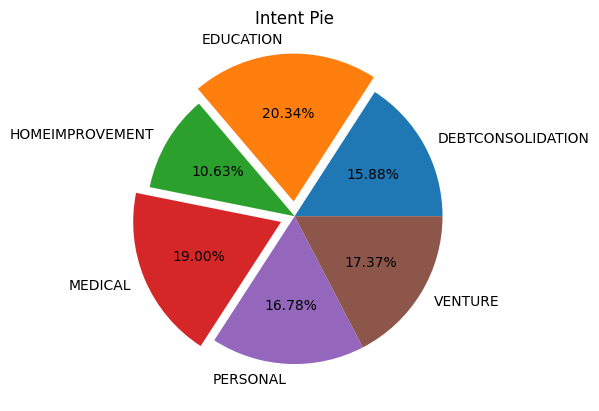

In [3]:
data.groupby(["loan_intent"]).size().plot(kind="pie",title="Intent Pie",autopct="%.2f%%",explode=(0,0.1,0,0.1,0,0))
plt.savefig("Visuals/IntentRatio.png")
plt.show()

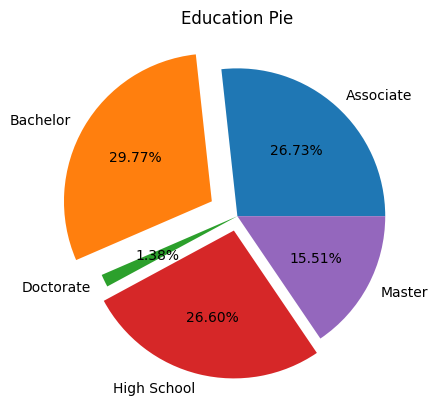

In [4]:
data.groupby(["person_education"]).size().plot(kind="pie",title="Education Pie",autopct="%.2f%%",explode=(0,0.2,0,0.1,0))
plt.savefig("Visuals/EducationPie.png")
plt.show()

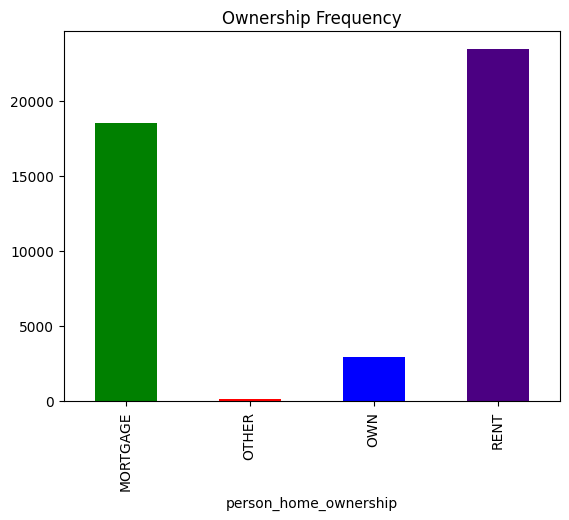

In [5]:
data.groupby(["person_home_ownership"]).size().plot(kind="bar",title="Ownership Frequency",color=["green","red","blue","indigo"])
plt.savefig("Visuals/OwnerShipCount.png")
plt.show()

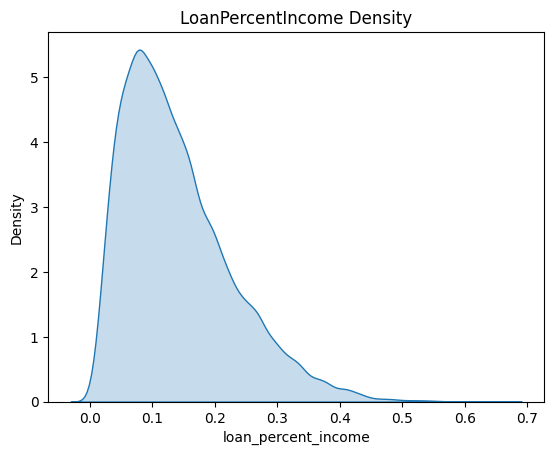

In [6]:
sns.kdeplot(data["loan_percent_income"],fill=True)
plt.title("LoanPercentIncome Density")
plt.savefig("Visuals/LoanPercentIncomeDensity.png")
plt.show()

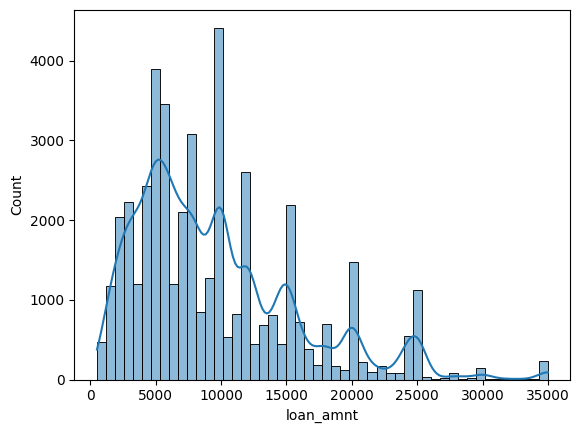

In [7]:
sns.histplot(data["loan_amnt"],bins=50,kde=True)
plt.savefig("Visuals/LoanAmountCount.png")
plt.show()

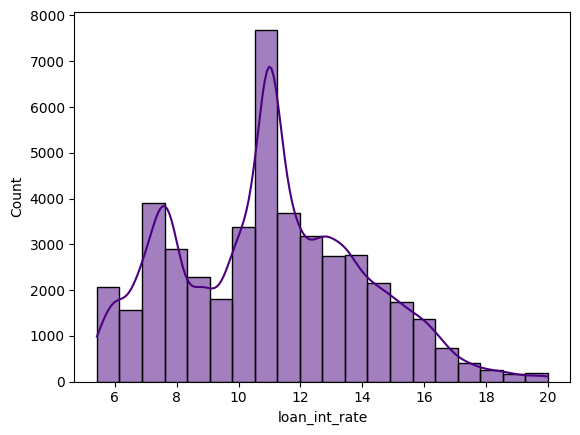

In [8]:
sns.histplot(data["loan_int_rate"],bins=20,kde=True,color="indigo")
plt.savefig("Visuals/LoanIntRateCount.png")
plt.show()

## BIVARIATE

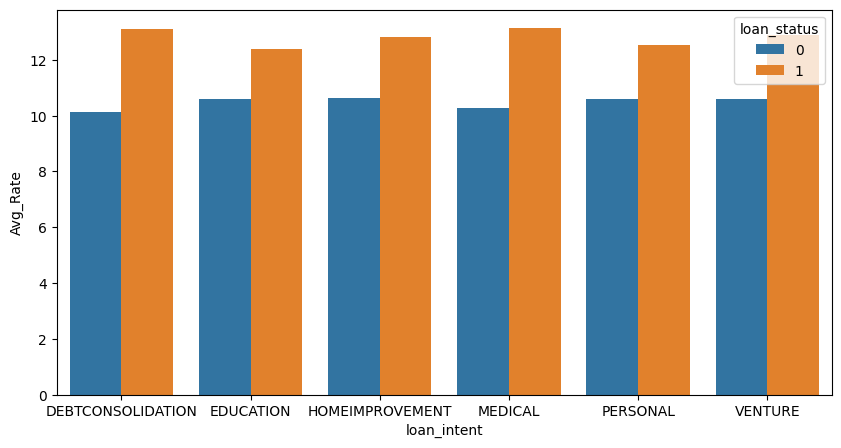

In [9]:
rate = data.groupby(["loan_intent","loan_status"])["loan_int_rate"].mean().reset_index(name="Avg_Rate")
plt.figure(figsize=(10,5))
sns.barplot(rate,y=rate["Avg_Rate"],x=rate["loan_intent"],hue="loan_status")
plt.savefig("Visuals/Bivariate/LoanIntent&AvgRate.png")
plt.show()

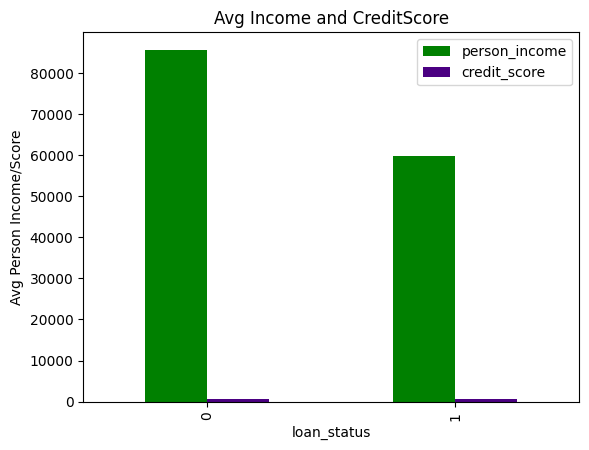

In [10]:
Score_status = data.groupby(["loan_status"]).agg({"person_income":"mean","credit_score":"mean"})
Score_status.plot(kind="bar",color=["Green","Indigo"],label="Avg Income",title="Avg Income and CreditScore")
plt.legend()
plt.ylabel("Avg Person Income/Score")
plt.savefig("Visuals/Bivariate/AvgIncome&CreditSCORE.png")
plt.show()

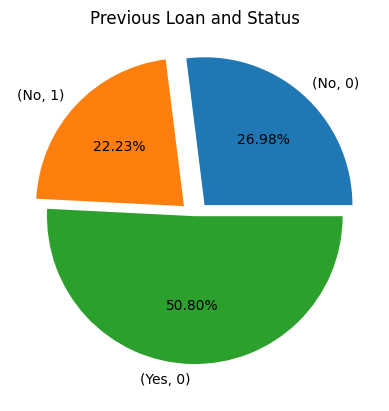

In [11]:
data.groupby(["previous_loan_defaults_on_file","loan_status"]).size().plot(kind="pie",autopct="%.2f%%",explode=(0.1,0.1,0),title="Previous Loan and Status")
plt.savefig("Visuals/Bivariate/PreviousLoan&Status.png")
plt.show()

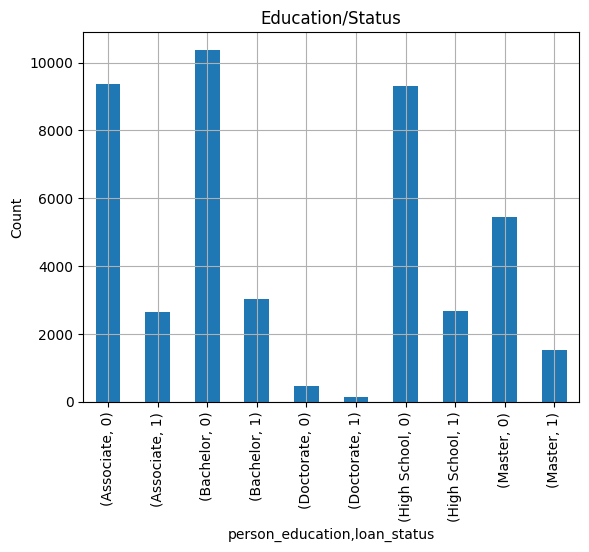

In [12]:
data.groupby(["person_education","loan_status"]).size().plot(kind="bar",grid=True,title="Education/Status")
plt.ylabel("Count")
plt.savefig("Visuals/Bivariate/Education&Status.png")
plt.show()

In [15]:
Score_status

,person_income,credit_score
loan_status,,
0,85630.263567,632.785328
1,59886.096900,631.887200


## FINAL REPORT: EXPLORATORY DATA ANALYSIS
<li><b>UNIVARIATE ANALYSIS</b>:<br>
    Loan Applicants from Bachelors are highest with 29.77% followed by associate,high school and lowest from doctorate.<br>
    Loan Applicants from Education as intent is highest with 20.34% followed by Medical,Venture,Personal,DebtConsolidation and      lowest from Homeimprovement<br>
    Loan Applicants with loan around 5000-12000 are highest followed by lowest around 25000 to 35000<br>
    Loan Applicants with Interest rate 10-12% are highest followed by fatter tail towards the end.<br>
    Applicants with Ownership as Rent are highest followed by Mortgage,own,others.
</li>
<li><b>Bivariate Analysis:</b><br>
    It is found that Avg PersonsIncome 85630 with Avg credit score 632 are approved for loan and Avg  59886 with Avg credit score a 631 are not approved for loan.<br>
    50.80% of Applicants with previous loan as Yes are not approved for loan status however with 22% and 26% of Applicants with previous loan as No are approved and are not approved respectively.
    <br>
    
</li>
